In [1]:
import csv
import re
import pandas as pd


spam_csv = pd.read_csv('spamtexts.csv', encoding='latin-1')
df = pd.DataFrame(spam_csv)

In [2]:
ham = 1
spam = 2

# CREATING NEW COLUMN 'category' TO CATEGORIES HAM=0/SPAM=1
# REMOVING OLD COLUMN 'Category'
df.insert(1, 'category', 1)
df.loc[df['Category'] == 'spam', 'category'] = 2

df = df.drop(['Category'], axis=1)

In [3]:
# LOWER-CASING ALL THE TEXT
df.message = df.message.str.lower()

In [4]:
message_char_list = []

for row in df.message:
    for character in row:
        if character not in message_char_list:
            print(character)
            message_char_list.append(character)
        else:
            pass

g
o
 
u
n
t
i
l
j
r
p
,
c
a
z
y
.
v
b
e
s
w
d
f
h
m
k
2
1
0
5
x
8
7
q
(
)
&
'
4
3
!
?
â
£
*
9
6
>
/
+
:
=

-
ã
º


¼
;
#
"
@
$

~
|
_

<
¦
\
¨
^

%

[
]


»
©

¬



	
é

¥
¾
¡


In [5]:
print(message_char_list)

['g', 'o', ' ', 'u', 'n', 't', 'i', 'l', 'j', 'r', 'p', ',', 'c', 'a', 'z', 'y', '.', 'v', 'b', 'e', 's', 'w', 'd', 'f', 'h', 'm', 'k', '2', '1', '0', '5', 'x', '8', '7', 'q', '(', ')', '&', "'", '4', '3', '!', '?', 'â', '£', '*', '9', '6', '>', '/', '+', ':', '=', '\x92', '-', 'ã', 'º', '\x80', '\x98', '¼', ';', '#', '"', '@', '$', '\x9c', '~', '|', '_', '\x93', '<', '¦', '\\', '¨', '^', '\x94', '%', '\x91', '[', ']', '\x99', '\x96', '»', '©', '\x89', '¬', '\r', '\n', '\t', 'é', '\x88', '¥', '¾', '¡']


In [6]:
import string
alphabet = list(string.ascii_lowercase)
punctuation = list(string.punctuation)
numbers = list(string.digits)
whitespace = list(string.whitespace)

print(alphabet, punctuation, numbers, whitespace)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] [' ', '\t', '\n', '\r', '\x0b', '\x0c']


In [7]:
dirty_char_list = []

for x in message_char_list:
    if x not in alphabet:
        if x not in numbers:
            if x not in punctuation:
                dirty_char_list.append(x)

dirty_char_list.remove(' ')

In [8]:
print(dirty_char_list)

['â', '£', '\x92', 'ã', 'º', '\x80', '\x98', '¼', '\x9c', '\x93', '¦', '¨', '\x94', '\x91', '\x99', '\x96', '»', '©', '\x89', '¬', '\r', '\n', '\t', 'é', '\x88', '¥', '¾', '¡']


Plan is to create a function that checks to see if character is in the dirty_char_list. 
* If so it will replace the character depending on what it is.
* If it is a number, replace with number " ",
* If it is punctuation, replace with " ",
* Otherwise, replace it with " ".
* Finally replace whitespace where whitespace len > 1, to " ".

In [9]:
df_new = df

print(df_new.message)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ã¼ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object


In [10]:
for x in dirty_char_list:
    df_new.message = df_new.message.str.replace(x, "")

In [11]:
for x in punctuation:
    df_new.message = df_new.message.str.replace(x, "")

C:\Users\smbal\AppData\Local\Temp\ipykernel_45136\585386443.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new.message = df_new.message.str.replace(x, "")


In [12]:
for x in numbers:
    df_new.message = df_new.message.str.replace(x, 'number')

In [13]:
df_new.to_csv("preprocessing_spamtexts.csv", index=False)

In [14]:
df_new.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,2,free entry in number a wkly comp to win fa cup...
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
5,2,freemsg hey there darling its been number week...
6,1,even my brother is not like to speak with me t...
7,1,as per your request melle melle oru minnaminun...
8,2,winner as a valued network customer you have b...
9,2,had your mobile numbernumber months or more u ...


In [15]:
# Splitting data into two new dataframes based on category
df_ham, df_spam = [x for _, x in df_new.groupby(df_new.category == 2)]

In [16]:
df_ham.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
6,1,even my brother is not like to speak with me t...
7,1,as per your request melle melle oru minnaminun...
10,1,im gonna be home soon and i dont want to talk ...
13,1,ive been searching for the right words to than...
14,1,i have a date on sunday with will
16,1,oh kim watching here


In [17]:
#print(df_ham, df_spam)
print(len(df_ham), len(df_spam)) #expecting 4825 ham 747 spam

4825 747


In [18]:
# train = 0:3377
df_ham.iloc[0:3378].to_csv("nonspam_train.csv", index=False, header=False)
# test = 3378:4824
df_ham.iloc[3379:4824].to_csv("nonspam_test.csv", index=False, header=False)

In [19]:
# train = 0:523
df_spam.iloc[0:523].to_csv("spam_train.csv", index=False, header=False)
# test = 524:746
df_spam.iloc[524:746].to_csv("spam_test.csv", index=False, header=False)

In [20]:
train_start = 0
train_end = 523
test_start = 524
test_end = 746

In [21]:
# Creating four more CSV's that have equal amount of spam/ham in train/test sets.
df_ham.iloc[train_start:train_end].to_csv("eq_nonspam_train.csv", index=False)
df_ham.iloc[test_start:test_end].to_csv("eq_nonspam_test.csv", index=False)
df_spam.iloc[train_start:train_end].to_csv("eq_spam_train.csv", index=False)
df_spam.iloc[test_start:test_end].to_csv("eq_spam_test.csv", index=False)

In [22]:
word_list = []
for message in df_new.message.str.split(' '):
    word_list.extend(message)

In [23]:
print(len(word_list))

87265


In [24]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [25]:
word_dict = {}
temp_holder = []

In [26]:
for word in word_list:
    if word in stop_words:
        pass
    elif word not in temp_holder:
        temp_holder.append(word)
        word_dict[word] = word_list.count(word)
    else:
        pass

In [27]:
del word_dict['']

In [28]:
sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
#print(sorted_dict)

In [29]:
word_freq_df = pd.DataFrame.from_dict(word_dict, orient='index', columns=['frequency'])

In [30]:
word_freq_df.insert(0, "word", word_freq_df.index)

In [31]:
word_freq_df = word_freq_df.reset_index(drop=True)

In [32]:
word_freq_df.sort_values('frequency', ascending=False)

,word,frequency
24,number,1176
20,u,1130
102,call,575
119,im,473
204,ur,390
...,...,...
4842,themobyo,1
4841,converted,1
4839,memory,1
4838,feelingood,1


In [33]:
ham_word_list = []
for message in df_ham.message.str.split(' '):
    ham_word_list.extend(message)

spam_word_list = []
for message in df_spam.message.str.split(' '):
    spam_word_list.extend(message)

spam_word_dict = {}
ham_word_dict = {}
spam_temp = []
ham_temp = []

for word in ham_word_list:
    if word in stop_words:
        pass
    elif word not in ham_temp:
        ham_temp.append(word)
        ham_word_dict[word] = ham_word_list.count(word)
    else:
        pass

for word in spam_word_list:
    if word in stop_words:
        pass
    elif word not in spam_temp:
        spam_temp.append(word)
        spam_word_dict[word] = spam_word_list.count(word)
    else:
        pass

del spam_word_dict['']
del ham_word_dict['']

In [34]:
word_freq_df = word_freq_df.loc[word_freq_df.frequency >= 100 ]

In [35]:
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

In [36]:
spam_freq_df = pd.DataFrame.from_dict(spam_word_dict, orient='index', columns=['frequency'])
spam_freq_df.insert(0, "word", spam_freq_df.index)
spam_freq_df = spam_freq_df.reset_index(drop=True)
spam_freq_df = spam_freq_df.sort_values('frequency', ascending=False)
spam_freq_df = spam_freq_df.loc[spam_freq_df.frequency >= 100 ]

In [37]:
ham_freq_df = pd.DataFrame.from_dict(ham_word_dict, orient='index', columns=['frequency'])
ham_freq_df.insert(0, "word", ham_freq_df.index)
ham_freq_df = ham_freq_df.reset_index(drop=True)
ham_freq_df = ham_freq_df.sort_values('frequency', ascending=False)
ham_freq_df = ham_freq_df.loc[ham_freq_df.frequency >= 100 ]

In [38]:
max_words = 2500
x = 0

freq_word_list = []
# Writing the most frequent 2500 words into the dictionary representing the features.
with open("dictionary.txt", 'w') as f: 
    for key, value in sorted_dict:
        if x <= max_words:
            f.write(f'{key} {value}\n')
            freq_word_list.append(key)
            x += 1
        else:
            break

In [39]:
freq_word_list

['number',
 'u',
 'call',
 'im',
 'ur',
 'get',
 'numbernumbernumbernumbernumbernumbernumbernumbernumbernumbernumber',
 'numbernumbernumber',
 'dont',
 'go',
 'ok',
 'ltgt',
 'free',
 'numbernumbernumbernumber',
 'numbernumbernumbernumbernumber',
 'know',
 'like',
 'ill',
 'got',
 'good',
 'come',
 'time',
 'day',
 'love',
 'numbernumber',
 'want',
 'send',
 'text',
 'going',
 'one',
 'need',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'r',
 'back',
 'stop',
 'n',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'well',
 'later',
 'think',
 'hi',
 'da',
 'please',
 'take',
 'cant',
 'phone',
 'week',
 'night',
 'oh',
 'much',
 'great',
 'hey',
 'claim',
 'dear',
 'pls',
 'happy',
 'hope',
 'thats',
 'give',
 'make',
 'way',
 'work',
 'wat',
 'say',
 'right',
 'already',
 'prize',
 'tomorrow',
 'ask',
 'said',
 'yes',
 'really',
 'yeah',
 'e',
 'amp',
 'message',
 'didnt',
 'msg',
 'c',
 'miss',
 'life',
 'meet',
 'last',
 'morning',
 'babe',
 'ive',
 'would',
 'cos',
 'anythi

In [40]:
for word in freq_word_list:
    print(freq_word_list.index(word))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [41]:
max_words = 2500
x = 0

# Writing the most frequent 2500 words without their count.
with open("freq_dictionary.txt", 'w') as f: 
    for key, value in sorted_dict:
        if x < 2500:
            f.write(f'{key}\n')
            x += 1
        else:
            break

In [42]:
a_data = pd.read_csv("eq_nonspam_train.csv")
b_data = pd.read_csv("eq_nonspam_test.csv")
c_data = pd.read_csv("eq_spam_train.csv")
d_data = pd.read_csv("eq_spam_test.csv")

nstrain_df = pd.DataFrame(a_data)
nstest_df = pd.DataFrame(b_data)
strain_df = pd.DataFrame(c_data)
stest_df = pd.DataFrame(d_data)

In [43]:
train_df = pd.concat([nstrain_df, strain_df]).reset_index(drop=True) #1046 x 2
test_df = pd.concat([nstest_df, stest_df]).reset_index(drop=True) #444 x 2

In [44]:
train_df.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,1,u dun say so early hor u c already then say
3,1,nah i dont think he goes to usf he lives aroun...
4,1,even my brother is not like to speak with me t...
5,1,as per your request melle melle oru minnaminun...
6,1,im gonna be home soon and i dont want to talk ...
7,1,ive been searching for the right words to than...
8,1,i have a date on sunday with will
9,1,oh kim watching here


In [45]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in train_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in word_list:
            features.append((index + 1, word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("train_features.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [46]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in train_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in freq_word_list:
            features.append((index + 1, freq_word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("train_features2500.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [47]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in test_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in word_list:
            features.append((index + 1, word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("test_features.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [48]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in test_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in freq_word_list:
            features.append((index + 1, freq_word_list.index(word) + 1, words.count(word)))
            
# Write the features to a file
with open("test_features2500.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [49]:
# Write the category values to a file
with open("train_labels.txt", "w") as f:
    for index, row in train_df.iterrows():
        f.write(f"{row['category']}\n")

In [50]:
# Write the category values to a file
with open("test_labels.txt", "w") as f:
    for index, row in test_df.iterrows():
        f.write(f"{row['category']}\n")

In [51]:
#VISUALISATION TIME
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

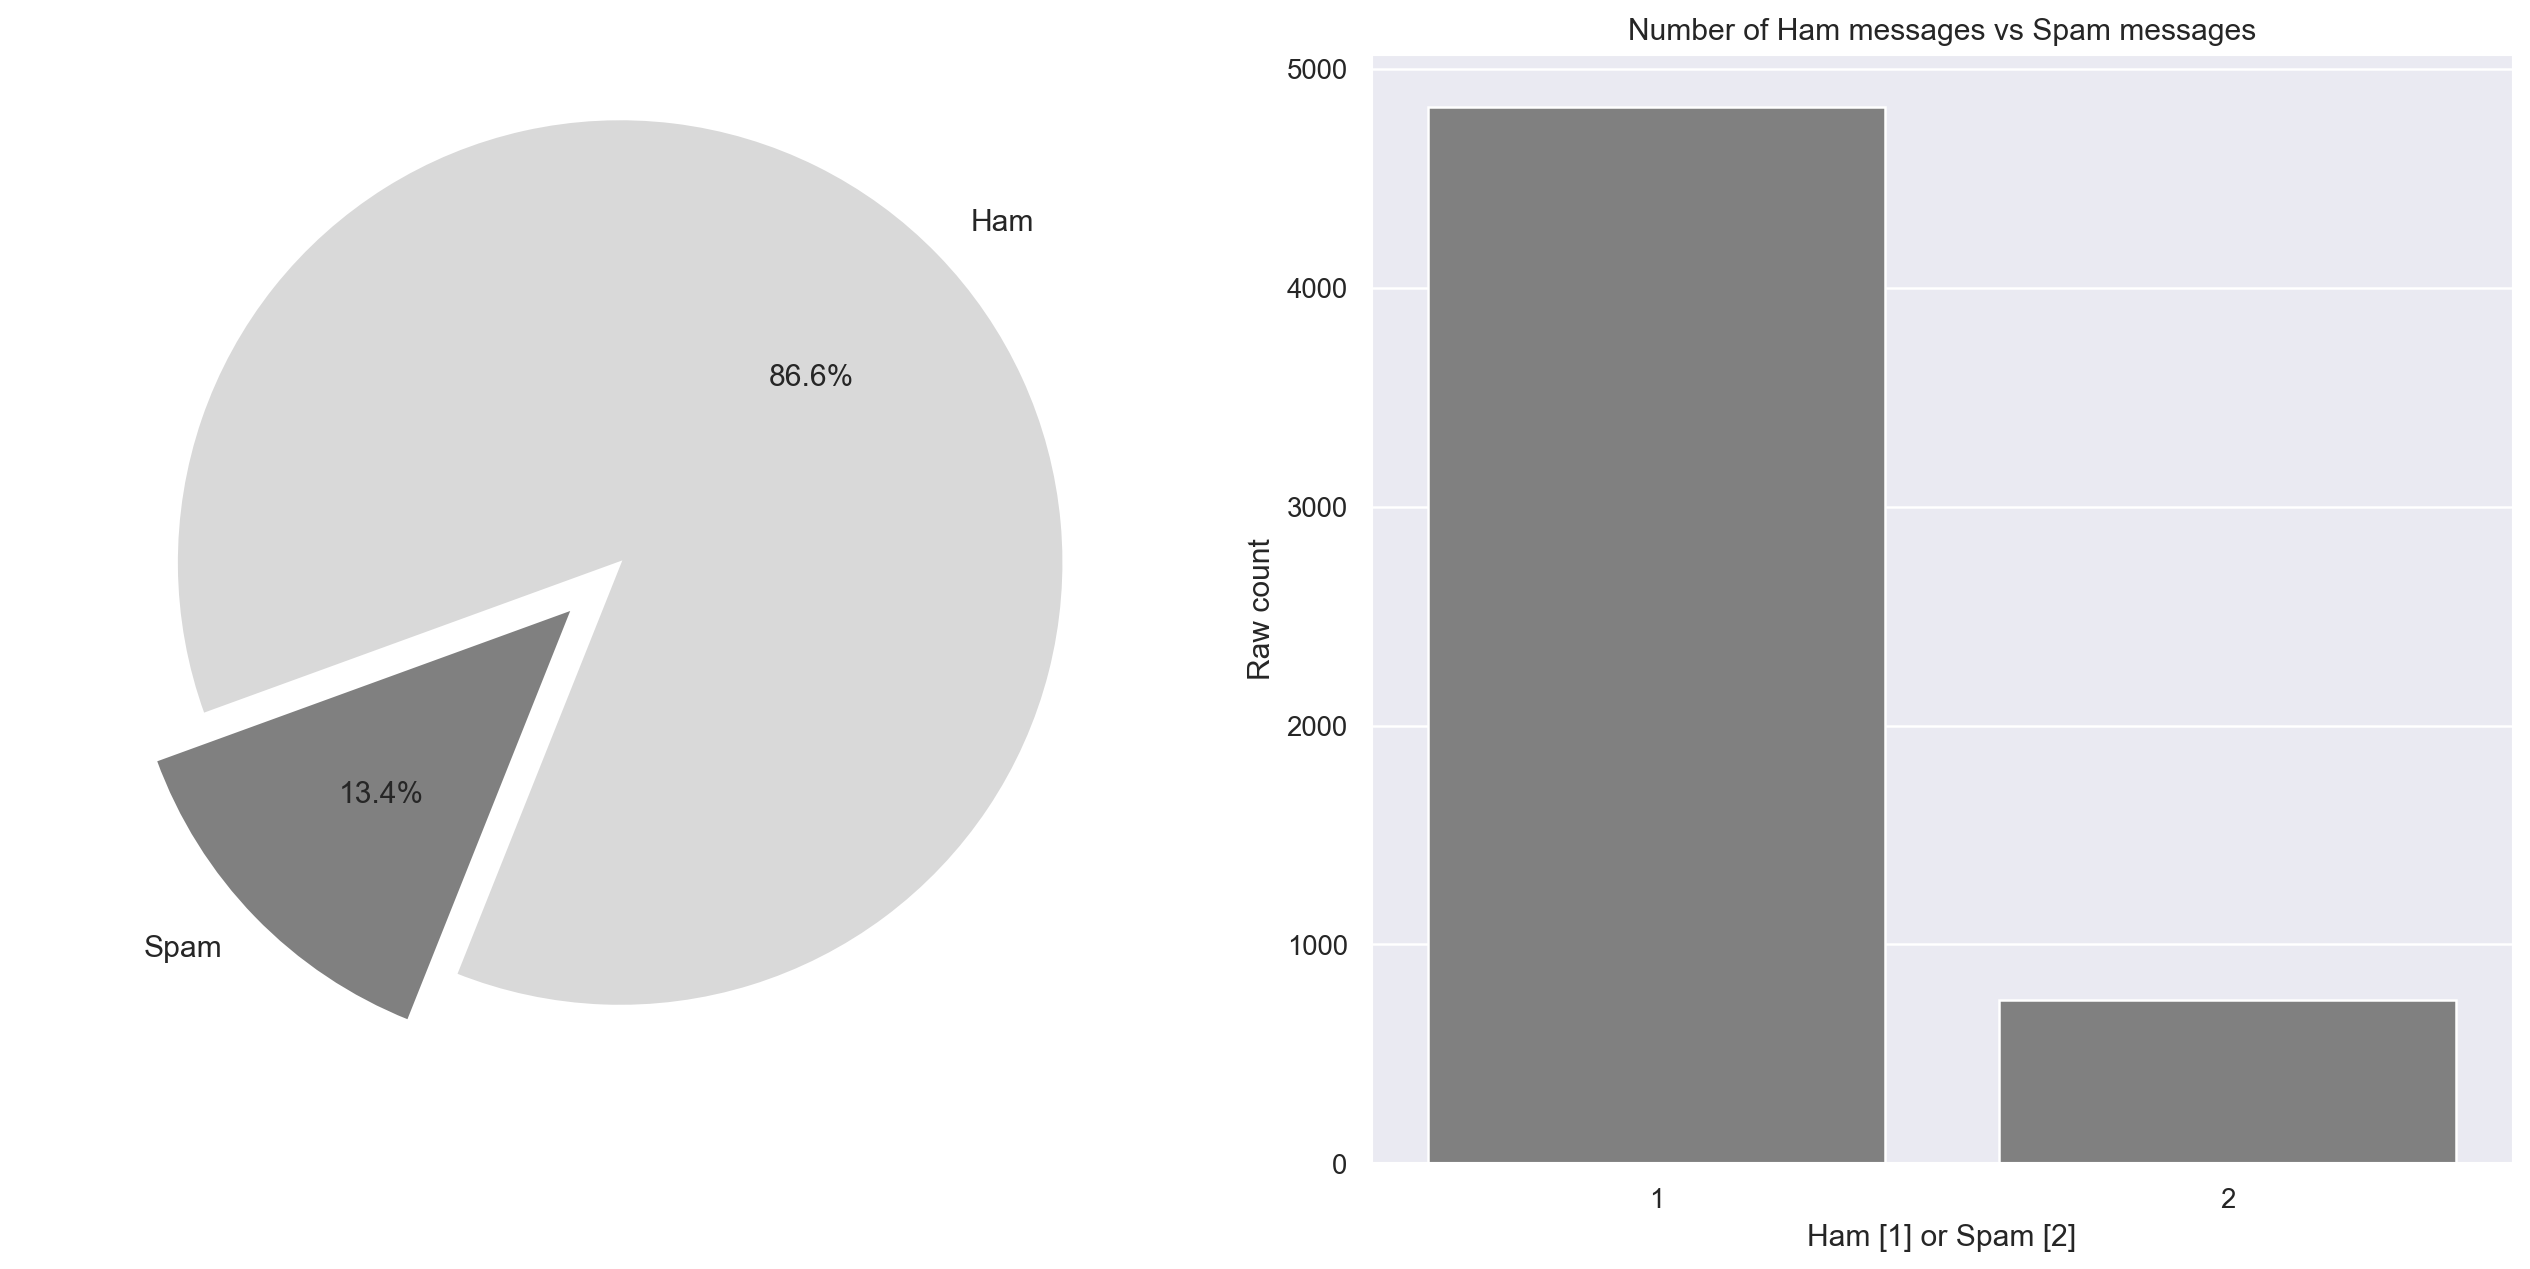

In [52]:
counts = [747, 4825]

plt.title='Number of Ham messages vs Spam messages'
plt.figure(figsize=(18, 8), dpi=180)
plt.subplot(1, 2, 1)
plt.pie(counts, labels = ['Spam', 'Ham'], textprops={'fontsize': 12}, startangle=200, colors=['#808080', '#d9d9d9'], explode=[0, 0.15], autopct='%1.1f%%')

plt.subplot(1, 2, 2)
ax = sns.barplot(x = df_new['category'].unique(), y = df_new['category'].value_counts(), color='grey')
#specfiy axis labels
ax.set(xlabel='Ham [1] or Spam [2]',
       ylabel='Raw count',
       title='Number of Ham messages vs Spam messages')


plt.show()

In [53]:
spam_text_list = df_spam.message.to_list()
ham_text_list = df_ham.message.to_list()


In [54]:
spam_text = ' '.join(spam_text_list)
ham_text = ' '.join(ham_text_list)

In [55]:
spam_cloud = WordCloud(max_words=400, height= 800, width = 1500, colormap='rocket').generate(spam_text)
ham_cloud = WordCloud(max_words=400, height= 800, width = 1500, colormap='rocket').generate(ham_text)

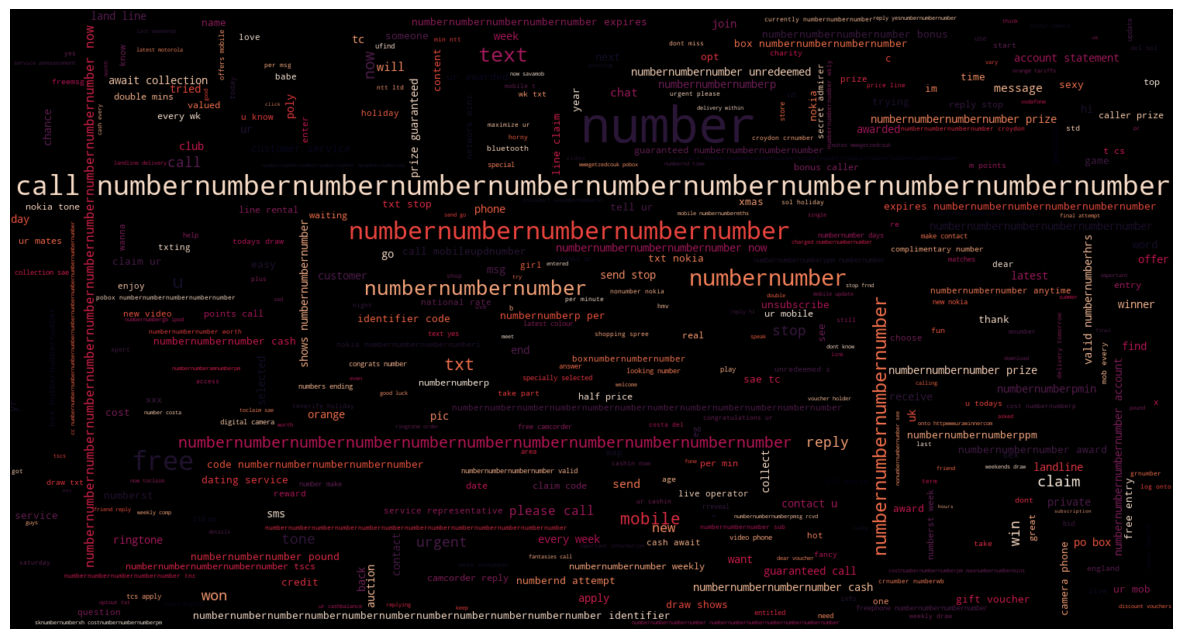

In [56]:
plt.figure(figsize = (15, 10))
plt.imshow(spam_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

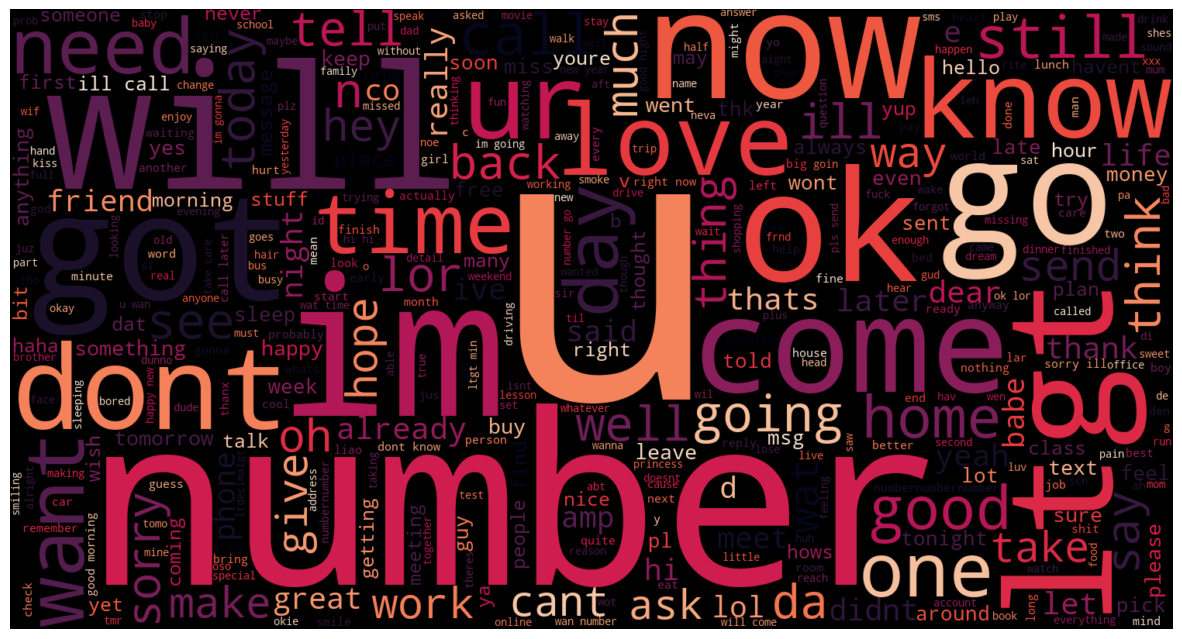

In [57]:
plt.figure(figsize = (15, 10))
plt.imshow(ham_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

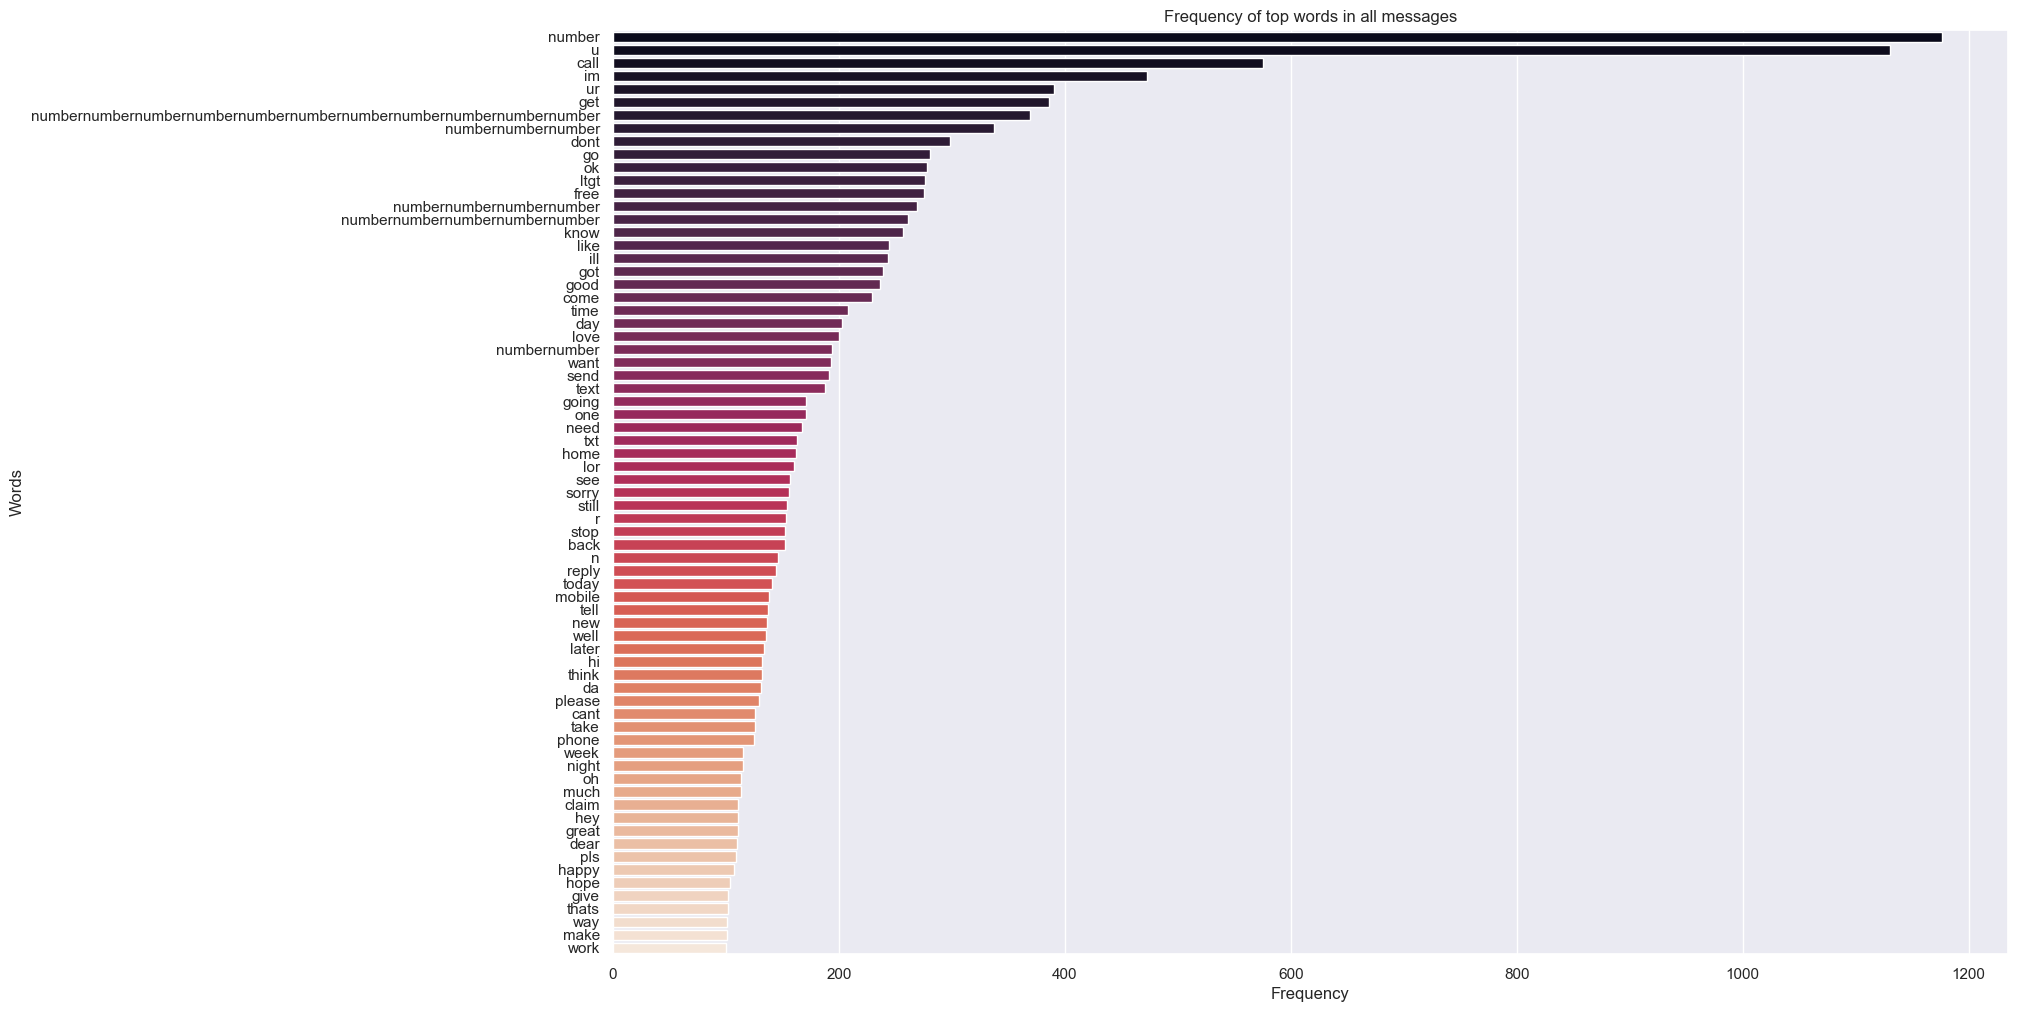

In [58]:
plt.figure(figsize=(18,12))
sns.barplot(y = word_freq_df['word'], x= word_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in all messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

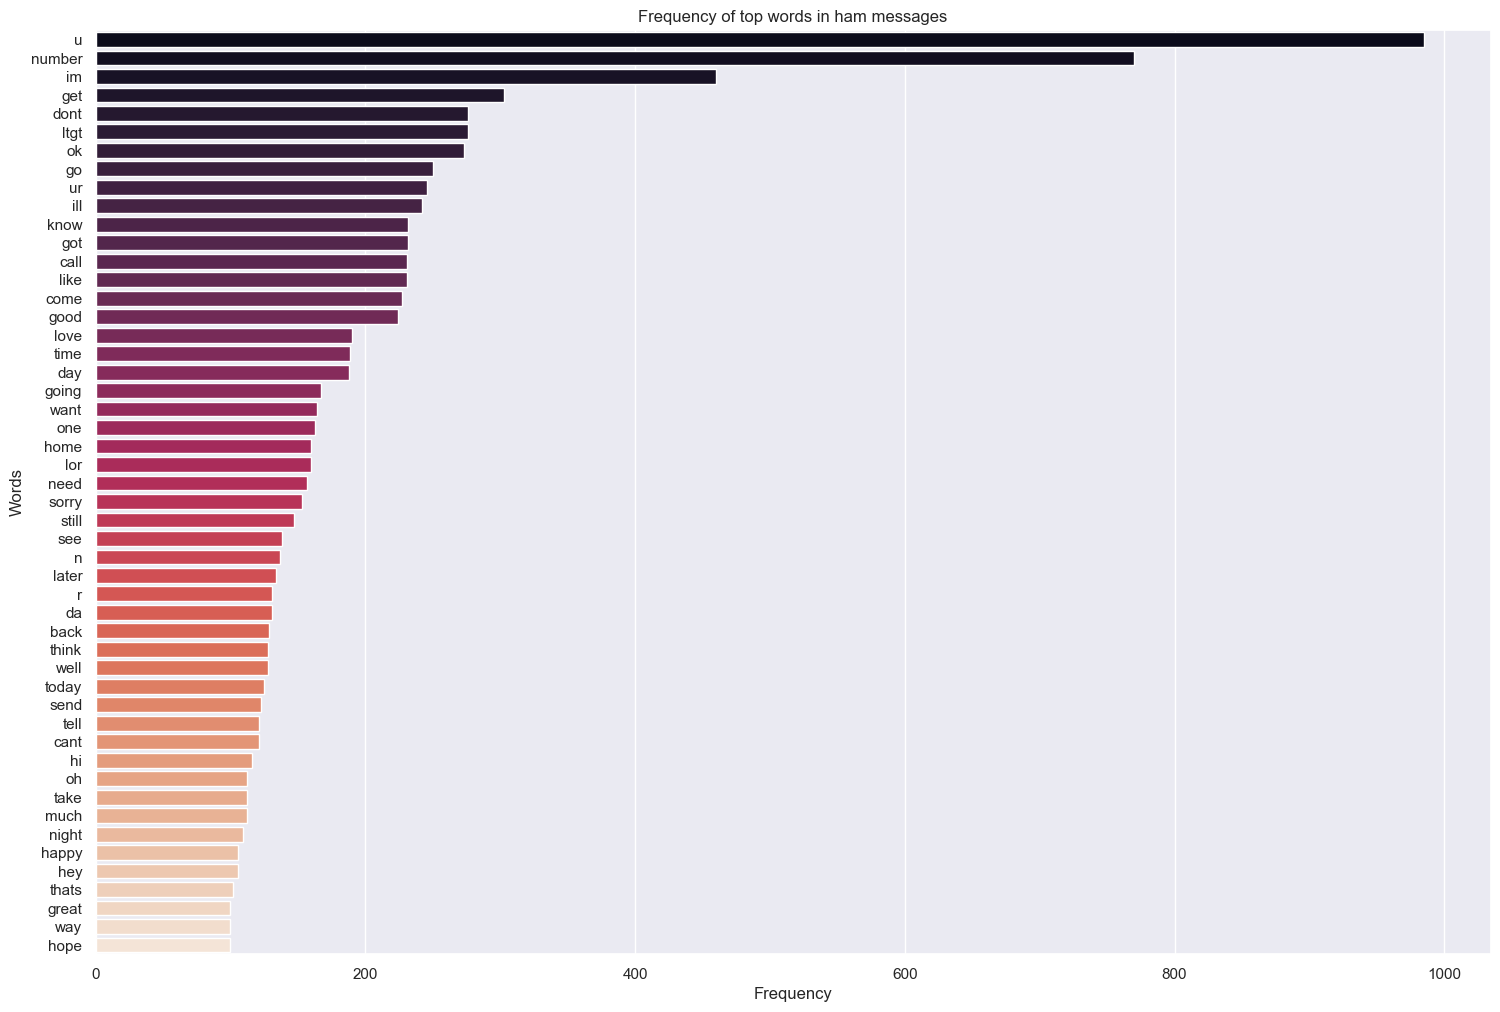

In [59]:
plt.figure(figsize=(18,12))
sns.barplot(y = ham_freq_df['word'], x= ham_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in ham messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

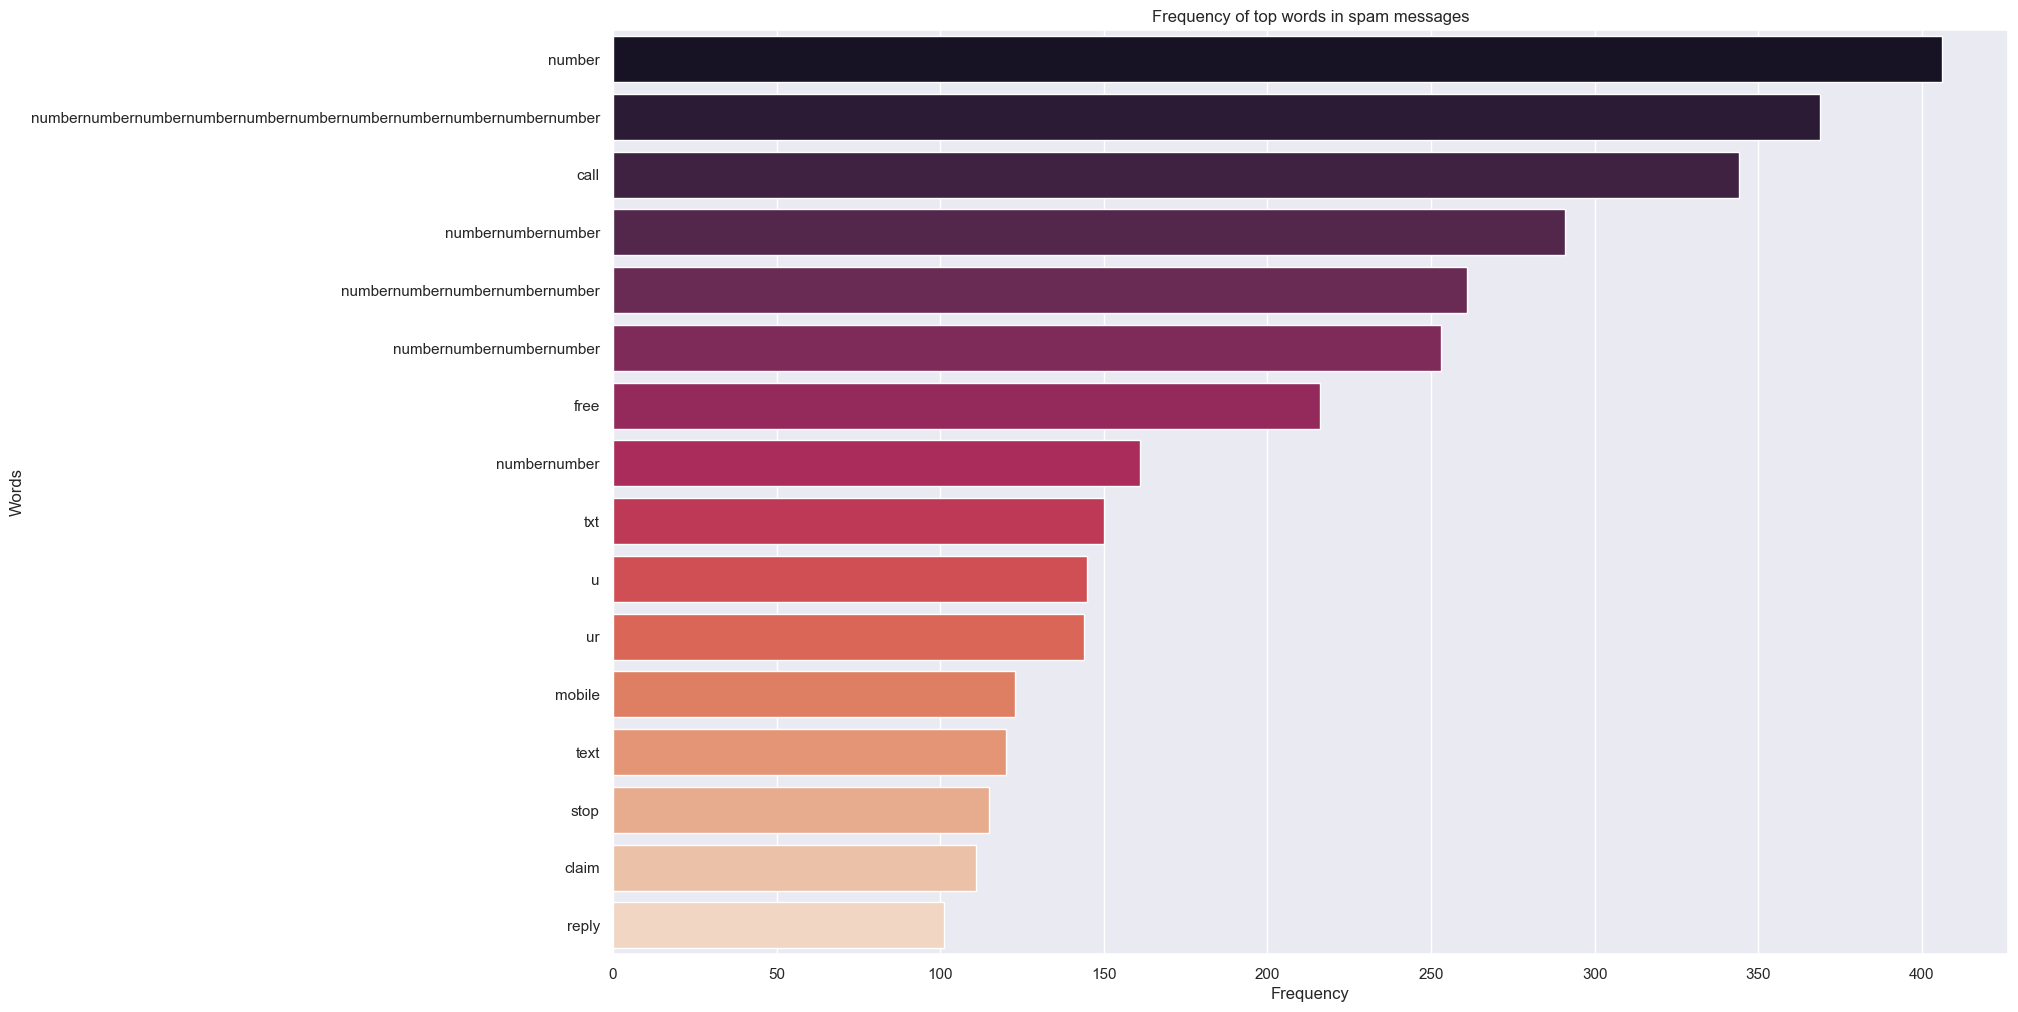

In [60]:
plt.figure(figsize=(18,12))
sns.barplot(y = spam_freq_df['word'], x= spam_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in spam messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()